<a href="https://colab.research.google.com/github/xinnazim/projects/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas_ta

import zipfile
import os
import pandas as pd
import numpy as np
import pandas_ta as ta
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from statsmodels.tsa.api import AutoReg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=b2dc8cd564de78aafe968addeac7f2118c37e86110b0440b265315913df55f12
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


#0. 데이터 변환
* Tick 데이터 변환하여 드라이브에 저장

In [ ]:
#0. 틱 데이터 변환하여 드라이브에 저장하기

# 틱 데이터 변환 함수
def convert_tick_to_ohlcv(data):
    """
    Converts given Binance tick data into 1-hour interval OHLCV (Open, High, Low, Close, Volume) data.
    :param data: DataFrame with Tick data
    :return: DataFrame with the Open, High, Low, Close, Volume values
    """

    data['time'] = pd.to_datetime(data['time'], unit='ms')
    ohlcv = data.resample('1H', on='time').agg({
        'price': ['first', 'max', 'min', 'last'],
        'qty': 'sum'
})

    ohlcv.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    return ohlcv

In [ ]:
import pandas as pd
import zipfile

for i in range(1, 3):
  ## 구글 코랩을 이용한 코드입니다. 파일 경로를 맞춰 주시기 바랍니다. ##
  zip_file_path = '/content/drive/MyDrive/BDA/BTCUSDT-trades-2023-{:02d}.zip'.format(i)

  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      # 압축 파일 내의 CSV 파일의 이름 가져오기
      csv_file_name = zip_ref.namelist()[0]

      # CSV 파일을 압축 해제하여 읽기
      with zip_ref.open(csv_file_name) as file:
          # CSV 파일을 읽어 데이터프레임으로 변환
          data = pd.read_csv(file)

  df = convert_tick_to_ohlcv(data)
  ## 구글 코랩을 이용한 코드입니다. 파일 경로를 맞춰 주시기 바랍니다. ##
  file_path = '/content/drive/MyDrive/BDA/Test/2023-{:02d}.csv'.format(i)
  df.to_csv(file_path, index=True)
  print(f"File saved at: {file_path}")

In [ ]:
import pandas as pd
import zipfile

for i in range(1, 13):
  ## 구글 코랩을 이용한 코드입니다. 파일 경로를 맞춰 주시기 바랍니다. ##
  zip_file_path = '/content/drive/MyDrive/BDA/BTCUSDT-trades-2023-{:02d}.zip'.format(i)

  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      # 압축 파일 내의 CSV 파일의 이름 가져오기
      csv_file_name = zip_ref.namelist()[0]

      # CSV 파일을 압축 해제하여 읽기
      with zip_ref.open(csv_file_name) as file:
          # CSV 파일을 읽어 데이터프레임으로 변환
          data = pd.read_csv(file)

  df = convert_tick_to_ohlcv(data)
  ## 구글 코랩을 이용한 코드입니다. 파일 경로를 맞춰 주시기 바랍니다. ##
  file_path = '/content/drive/MyDrive/BDA/2023-{:02d}.csv'.format(i)
  df.to_csv(file_path, index=True)
  print(f"File saved at: {file_path}")


for i in range(1, 28):
  # 압축 파일 경로
  ## 구글 코랩을 이용한 코드입니다. 파일 경로를 맞춰 주시기 바랍니다. ##
  zip_file_path = '/content/drive/MyDrive/BDA/BTCUSDT-trades-2024-01-{:02d}.zip'.format(i)

  # 압축 파일 열기
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      # 압축 파일 내의 CSV 파일의 이름 가져오기
      csv_file_name = zip_ref.namelist()[0]

      # CSV 파일을 압축 해제하여 읽기
      with zip_ref.open(csv_file_name) as file:
          # CSV 파일을 읽어 데이터프레임으로 변환
          data = pd.read_csv(file)

  # 데이터프레임 확인
  df = convert_tick_to_ohlcv(data)
  ## 구글 코랩을 이용한 코드입니다. 파일 경로를 맞춰 주시기 바랍니다. ##
  file_path = '/content/drive/MyDrive/BDA/2024-01-{:02d}.csv'.format(i)
  df.to_csv(file_path, index=True)
  print(f"File saved at: {file_path}")

In [ ]:
import pandas as pd
import zipfile
from datetime import datetime

# 시작 날짜와 끝 날짜 정의
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 1, 27)

# 날짜 범위 생성
date_range = pd.date_range(start_date, end_date)

# 빈 DataFrame 생성
merged_df = pd.DataFrame()

# 반복문으로 각 날짜에 대한 CSV 파일 읽고 병합
for date in date_range:
    date_str = date.strftime('%Y-%m-%d')
    ## 구글 코랩을 이용한 코드입니다. 파일 경로를 맞춰 주시기 바랍니다. ##
    file_path = f'/content/drive/MyDrive/BDA/{date_str}.csv'

    try:
        # CSV 파일을 읽어 데이터프레임으로 변환
        df = pd.read_csv(file_path)

        # 데이터프레임을 병합
        merged_df = pd.concat([merged_df, df], ignore_index=True)
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# 결과를 하나의 CSV 파일로 저장
## 구글 코랩을 이용한 코드입니다. 파일 경로를 맞춰 주시기 바랍니다. ##
output_file_path = '/content/drive/MyDrive/BDA/2024-01.csv'
merged_df.to_csv(output_file_path, index=False)
print(f"Merged file saved at: {output_file_path}")

In [ ]:
### <변동성 함수>

def calculate_volatility(data, window=20):
    """
    Calculate the rolling volatility using the standard deviation of returns.
    :param data: DataFrame with OHLCV data
    :param window: The number of periods to use for calculating the standard deviation
    :return: DataFrame with the volatility values
    """

    # Calculate daily returns
    data['returns'] = data['Close'].pct_change()

    # Calculate the rolling standard deviation of returns
    data['volatility'] = data['returns'].rolling(window=window).std()
    return data

# 1. 데이터 불러오기 및 병합
* df : 2023.01 ~ 2024.01.27

In [ ]:
# 1. 데이터 불러오기 및 합치기
import os
import pandas as pd

# 년도와 월을 기반으로 파일 경로 생성
## 구글 코랩을 이용한 코드입니다. 파일 경로를 맞춰 주시기 바랍니다. ##
file_paths = ['/content/drive/MyDrive/BDA/2023-{:02d}.csv'.format(month) for month in range(1, 13)]

# 변수명을 생성하여 각 데이터프레임에 할당
for month, file_path in zip(range(1, 13), file_paths):
    df_name = 'df{:02d}'.format(month)
    globals()[df_name] = pd.read_csv(file_path)

# 데이터프레임을 저장할 리스트 생성
dfs = []

# 각 데이터프레임을 리스트에 추가
for month, file_path in zip(range(1, 13), file_paths):
    df_name = 'df{:02d}'.format(month)
    df = pd.read_csv(file_path)
    dfs.append(df)

# 모든 데이터프레임을 합치기
df2023 = pd.concat(dfs, ignore_index=True)
## 구글 코랩을 이용한 코드입니다. 파일 경로를 맞춰 주시기 바랍니다. ##
df2024 = pd.read_csv('/content/drive/MyDrive/BDA/2024-01.csv', index_col=0)
df = pd.concat([df2023, df2024], ignore_index=True)

df #모두 병합된 데이터

,time,Open,High,Low,Close,Volume
0,2023-01-01 00:00:00,16537.5,16540.9,16504.0,16527.0,5381.399
1,2023-01-01 01:00:00,16527.1,16554.3,16524.1,16550.4,3210.826
2,2023-01-01 02:00:00,16550.5,16557.1,16534.8,16542.4,2399.668
3,2023-01-01 03:00:00,16542.5,16542.5,16515.0,16529.3,3214.480
4,2023-01-01 04:00:00,16529.2,16530.4,16508.8,16517.8,3150.954
...,...,...,...,...,...,...
9403,2024-01-27 19:00:00,41785.0,41977.0,41775.1,41896.4,7765.565
9404,2024-01-27 20:00:00,41896.5,42070.0,41896.4,42049.6,5408.243
9405,2024-01-27 21:00:00,42049.6,42165.6,42001.8,42137.8,5859.277
9406,2024-01-27 22:00:00,42137.8,42187.1,42057.6,42135.3,5271.863


# 2. 데이터 전처리
* 결측치 보간

In [ ]:
# 2. 데이터 전처리
# 결측치 보간법으로 처리
import numpy as np
df['Volume'] = df['Volume'].replace(0, np.nan)

df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

df.interpolate(method='time', inplace=True)

origin_df = df.copy() # 원본 데이터 copy 생성해두기

### all_df
all_df = calculate_volatility(df, window=20)

# 결측치가 있는 행 제거
all_df = all_df.dropna()

# 3. X_test 예측
* lstm + AutoReg 앙상블 기법 사용

In [ ]:
# 전체 train(원본)
train_data = origin_df.copy()

In [ ]:
# 시계열 데이터를 supervised learning 형태로 변환
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # 입력
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # 예측
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        agg = pd.concat(cols, axis=1)
        agg.columns = names

        # 결측값 제거
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [ ]:
### LSTM

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

lags_ar=73
last_train_index = train_data.index[-1]

def simple_lstm_forecast(data, column_name, lags):
    # 데이터 전처리
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[[column_name]])

    # 시계열 데이터 supervised learning 형태로 변환
    reframed = series_to_supervised(scaled_data, lags, 1)

    # 학습, 테스트 데이터 분리
    values = reframed.values
    train = values[:-73, :]
    test = values[-73:, :]

    # 학습 데이터 입력, 출력으로 분리
    train_X, train_y = train[:, :-1], train[:, -1]

    # LSTM 모델 구성
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')

    # LSTM 모델 학습
    model.fit(train_X, train_y, epochs=20, batch_size=16, verbose=2, shuffle=False)

    # 마지막 73개 데이터로 미래의 73개 데이터 예측
    test_X = test[:, :-1]
    yhat = np.array([model.predict(test_X[i].reshape((1, lags, 1))) for i in range(73)])
    yhat = yhat.reshape((73,))

    # 예측 결과 역변환
    inv_yhat = scaler.inverse_transform(yhat.reshape(-1, 1))
    inv_yhat = inv_yhat[:, 0]

    return inv_yhat

# X_test 생성
future_data_lstm = pd.DataFrame(index=pd.date_range(start=(last_train_index + pd.Timedelta(hours=1)), periods=73, freq='H'))

# 각 변수에 대해 모델 학습 및 예측
for column in ['Open', 'Low', 'High', 'Close', 'Volume']:
    predictions = simple_lstm_forecast(train_data, column, lags_ar)
    future_data_lstm[column] = predictions

# 결과 출력
future_data_lstm

Epoch 1/20
579/579 - 5s - loss: 0.0163 - 5s/epoch - 9ms/step
Epoch 2/20
579/579 - 3s - loss: 0.0159 - 3s/epoch - 5ms/step
Epoch 3/20
579/579 - 3s - loss: 0.0155 - 3s/epoch - 5ms/step
Epoch 4/20
579/579 - 3s - loss: 0.0139 - 3s/epoch - 6ms/step
Epoch 5/20
579/579 - 3s - loss: 0.0128 - 3s/epoch - 5ms/step
Epoch 6/20
579/579 - 3s - loss: 0.0103 - 3s/epoch - 6ms/step
Epoch 7/20
579/579 - 3s - loss: 0.0082 - 3s/epoch - 5ms/step
Epoch 8/20
579/579 - 3s - loss: 0.0066 - 3s/epoch - 5ms/step
Epoch 9/20
579/579 - 3s - loss: 0.0053 - 3s/epoch - 5ms/step
Epoch 10/20
579/579 - 3s - loss: 0.0052 - 3s/epoch - 5ms/step
Epoch 11/20
579/579 - 4s - loss: 0.0048 - 4s/epoch - 8ms/step
Epoch 12/20
579/579 - 3s - loss: 0.0042 - 3s/epoch - 5ms/step
Epoch 13/20
579/579 - 3s - loss: 0.0049 - 3s/epoch - 4ms/step
Epoch 14/20
579/579 - 3s - loss: 0.0048 - 3s/epoch - 4ms/step
Epoch 15/20
579/579 - 3s - loss: 0.0048 - 3s/epoch - 6ms/step
Epoch 16/20
579/579 - 3s - loss: 0.0043 - 3s/epoch - 5ms/step
Epoch 17/20
579/5

,Open,Low,High,Close,Volume
2024-01-28 00:00:00,39473.183594,39610.070312,39912.925781,39819.386719,3852.748047
2024-01-28 01:00:00,39560.335938,39671.613281,40151.601562,39987.058594,6094.271973
2024-01-28 02:00:00,39733.546875,39827.324219,40125.570312,40068.531250,4654.442871
2024-01-28 03:00:00,39807.832031,39742.789062,40131.496094,39918.058594,4718.733398
2024-01-28 04:00:00,39645.562500,39744.164062,40036.726562,39870.414062,3516.841309
...,...,...,...,...,...
2024-01-30 20:00:00,41137.695312,41292.421875,41537.324219,41462.164062,1919.107788
2024-01-30 21:00:00,41151.757812,41336.507812,41693.871094,41558.234375,3933.524902
2024-01-30 22:00:00,41250.179688,41437.554688,41764.929688,41693.828125,3140.321289
2024-01-30 23:00:00,41386.851562,41523.191406,41849.128906,41776.074219,3282.568359


In [ ]:
### AutoReg

lags_ar = 73

from statsmodels.tsa.api import AutoReg
import pandas as pd

# AR 모델 학습 함수
def fit_autoreg(data, column_name, lags_ar):
    model_autoreg = AutoReg(data[column_name], lags=lags_ar, old_names=False)
    model_fit_autoreg = model_autoreg.fit()
    return model_fit_autoreg.predict(start=len(data), end=len(data) + 73 , dynamic=False)

# X_test 생성
future_data_autoreg = pd.DataFrame(index=pd.date_range(start=(last_train_index + pd.Timedelta(hours=1)), periods=24 * 3+1, freq='H'))

# 각 변수에 대해 모델 학습 및 예측
for column in ['Open', 'Low', 'High', 'Close', 'Volume']:
    predictions = fit_autoreg(train_data, column, lags_ar)
    future_data_autoreg[column] = predictions

# 결과 출력
future_data_autoreg

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain

,Open,Low,High,Close,Volume
2024-01-28 00:00:00,42157.110159,42059.544193,42134.783841,42085.273353,4092.728047
2024-01-28 01:00:00,42137.541730,42060.091630,42138.794792,42104.993993,4705.017979
2024-01-28 02:00:00,42158.160759,42039.779991,42169.411718,42114.618633,4948.932678
2024-01-28 03:00:00,42168.447202,42052.610022,42201.599110,42115.800568,5967.632201
2024-01-28 04:00:00,42170.251173,42058.613787,42207.207054,42126.124127,5820.189790
...,...,...,...,...,...
2024-01-30 20:00:00,42365.635838,42232.455794,42365.539342,42305.015616,13463.065070
2024-01-30 21:00:00,42366.682165,42230.714026,42368.039337,42305.041503,13235.496114
2024-01-30 22:00:00,42367.574950,42230.244395,42370.608767,42303.965026,12965.997035
2024-01-30 23:00:00,42367.212209,42228.392690,42370.357647,42304.235114,12698.949314


In [ ]:
### 앙상블

# 각 모델의 예측값에 가중치 적용

ensemble_predictions = 0.5 * future_data_autoreg + 0.5 * future_data_lstm # 평균을 사용

# X_test 예측 결과 출력
ensemble_predictions

,Open,Low,High,Close,Volume
2024-01-28 00:00:00,40815.146876,40834.807253,41023.854811,40952.330036,3972.738047
2024-01-28 01:00:00,40848.938834,40865.852456,41145.198177,41046.026293,5399.644976
2024-01-28 02:00:00,40945.853817,40933.552105,41147.491015,41091.574942,4801.687774
2024-01-28 03:00:00,40988.139617,40897.699542,41166.547602,41016.929581,5343.182800
2024-01-28 04:00:00,40907.906836,40901.388925,41121.966808,40998.269095,4668.515549
...,...,...,...,...,...
2024-01-30 20:00:00,41751.665575,41762.438835,41951.431780,41883.589839,7691.086429
2024-01-30 21:00:00,41759.219989,41783.610919,42030.955215,41931.637939,8584.510508
2024-01-30 22:00:00,41808.877319,41833.899541,42067.769227,41998.896575,8053.159162
2024-01-30 23:00:00,41877.031886,41875.792048,42109.743276,42040.154666,7990.758837


# 4. 새로운 변수 생성
* 기술적 지표 추가
  * MACD
  * BBP
  * THERMOma
  * Volume_MA

In [ ]:
### 새로운 변수 생성
import pandas_ta as ta

# 전체 데이터 + 예측 데이터
train_data = pd.concat([train_data, ensemble_predictions], ignore_index=False)
train = calculate_volatility(train_data, window=20)

# 기술적 지표 추가

# VMA
train['Volume_MA'] = train['Volume'].rolling(window=20).mean()

# MACD
train.ta.macd(close="Close", fast=10, slow=30, signal=9, append=True)

# Elder's Thermometer
train.ta.thermo(append=True)

# Bollinger Bands
train.ta.bbands(length=20, std=2, append=True)

train.dropna(inplace = True)

# 5. Train, test 나누기

In [ ]:
### train test split

# test
test = train[(train.index  >= "2024-01-28") & (train.index <= "2024-01-31")]

# X_train, y_train
X_train = train[(train.index < "2024-01-28")][["MACD_10_30_9", "THERMOma_20_2_0.5", "BBP_20_2.0",	"Volume_MA"]]
y_train =train[(train.index < "2024-01-28")][["volatility"]]

# 원본 test_data
test_data = all_df[(all_df.index >= "2024-01-28") & (all_df.index <= "2024-01-31")]
test_data

# X_test, y_true 값 나누기
X_test = test[["MACD_10_30_9",	"THERMOma_20_2_0.5", "BBP_20_2.0", "Volume_MA"]]

# 6. 랜덤포레스트 모델 학습

In [ ]:
### 모델 학습

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=700)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test) # 예측
predictions

<ipython-input-16-c74d474a68c8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


array([0.00385346, 0.00364333, 0.00339566, 0.00324786, 0.00299112,
       0.00294576, 0.0028552 , 0.00283838, 0.00275949, 0.00275716,
       0.00274336, 0.00252244, 0.00230379, 0.00236779, 0.00233922,
       0.00259807, 0.00255144, 0.00253467, 0.0025223 , 0.00244937,
       0.00252745, 0.00253416, 0.00222007, 0.00229509, 0.002284  ,
       0.00211462, 0.00188219, 0.00186275, 0.00210509, 0.00202581,
       0.00196494, 0.00191972, 0.00192375, 0.00190219, 0.00192281,
       0.00196748, 0.002108  , 0.00265407, 0.00300051, 0.00302794,
       0.00316148, 0.00314825, 0.00345881, 0.00359902, 0.00381524,
       0.00367101, 0.00365749, 0.00364106, 0.00346391, 0.00316014,
       0.003076  , 0.00287989, 0.00286346, 0.0028137 , 0.00280525,
       0.00278609, 0.00244091, 0.00222761, 0.00226469, 0.00216131,
       0.00222946, 0.00215755, 0.00211408, 0.00214043, 0.00223855,
       0.00224439, 0.00227321, 0.00203115, 0.00191935, 0.00211482,
       0.0021436 , 0.00214227, 0.00200003])

# 7. 제출파일 생성

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/BDA/[ASCENDxBDA] submission.csv')

In [ ]:
submission

,Unnamed: 0,pred_volatility
0,2024-01-28 0:00,0
1,2024-01-28 1:00,0
2,2024-01-28 2:00,0
3,2024-01-28 3:00,0
4,2024-01-28 4:00,0
...,...,...
68,2024-01-30 20:00,0
69,2024-01-30 21:00,0
70,2024-01-30 22:00,0
71,2024-01-30 23:00,0


In [ ]:
submission['pred_volatility'] = predictions

In [ ]:
submission

,Unnamed: 0,pred_volatility
0,2024-01-28 0:00,0.003853
1,2024-01-28 1:00,0.003643
2,2024-01-28 2:00,0.003396
3,2024-01-28 3:00,0.003248
4,2024-01-28 4:00,0.002991
...,...,...
68,2024-01-30 20:00,0.001919
69,2024-01-30 21:00,0.002115
70,2024-01-30 22:00,0.002144
71,2024-01-30 23:00,0.002142


In [ ]:
# 파일로 저장
submission.to_csv('/content/drive/MyDrive/BDA/bda_submission.csv', index=False)

In [ ]:
submission

,Unnamed: 0,pred_volatility
0,2024-01-28 0:00,0.003853
1,2024-01-28 1:00,0.003643
2,2024-01-28 2:00,0.003396
3,2024-01-28 3:00,0.003248
4,2024-01-28 4:00,0.002991
...,...,...
68,2024-01-30 20:00,0.001919
69,2024-01-30 21:00,0.002115
70,2024-01-30 22:00,0.002144
71,2024-01-30 23:00,0.002142


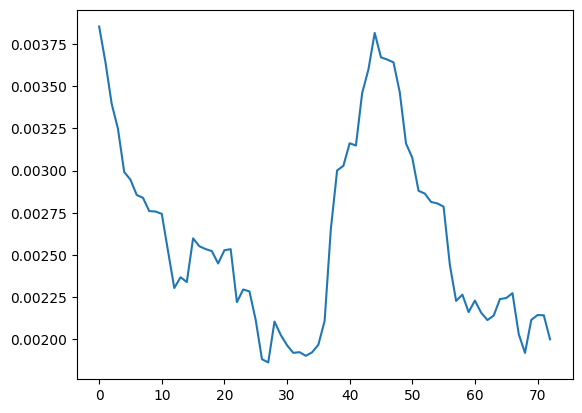

In [ ]:
import matplotlib.pyplot as plt
plt.plot(submission['pred_volatility'])